## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier

## Loading the data

In [4]:
train=pd.read_csv('d1.csv')

In [5]:
train.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [6]:
train.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [7]:
train.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [8]:
train.rename(columns={'Class/ASD Traits ': 'Class/ASD','Sex': 'Gender'}, inplace=True)
train.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Gender', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD'],
      dtype='object')

In [9]:
df = train
autist_count = df[df['Class/ASD'] == 'Yes'].shape[0]
print(autist_count)

728


## Visualising the data and understanding its various features

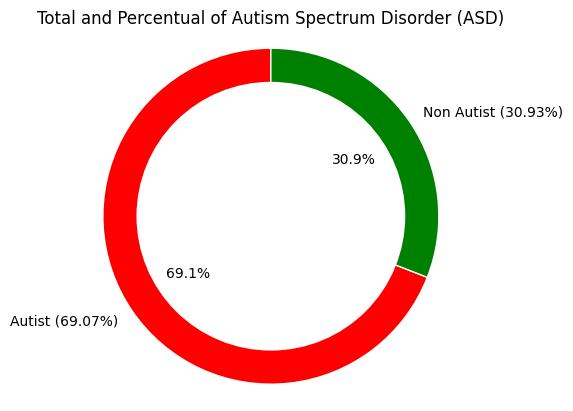

In [11]:
autism_map = {1: 'Autist', 0: 'Non Autist'}
autism_colors = ['red', 'green']

total_count = len(train)
non_autist_count = total_count - autist_count

autist_percent = autist_count / total_count * 100
non_autist_percent = non_autist_count / total_count * 100

fig, ax = plt.subplots()

ax.pie([autist_percent, non_autist_percent], labels=[f'Autist ({autist_percent:.2f}%)', f'Non Autist ({non_autist_percent:.2f}%)'],
       autopct='%1.1f%%', startangle=90, colors=autism_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()

### Here we can see that the data is highly biased and not normalized!!

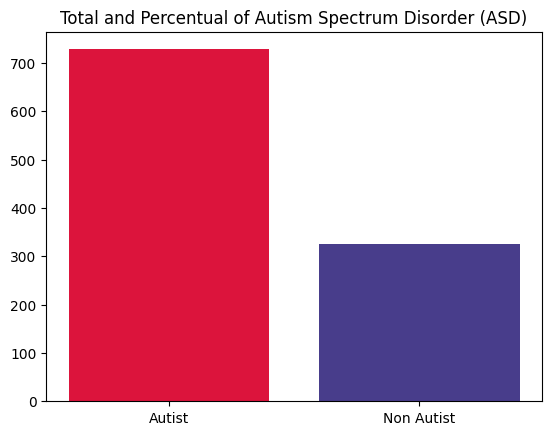

In [12]:
fig, ax = plt.subplots()

ax.bar(['Autist', 'Non Autist'], [autist_count, non_autist_count], color=['crimson', 'darkslateblue'])

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()

### Same plot in histogram format

In [13]:
train["Ethnicity"].value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

# Visualisation of Other features!!

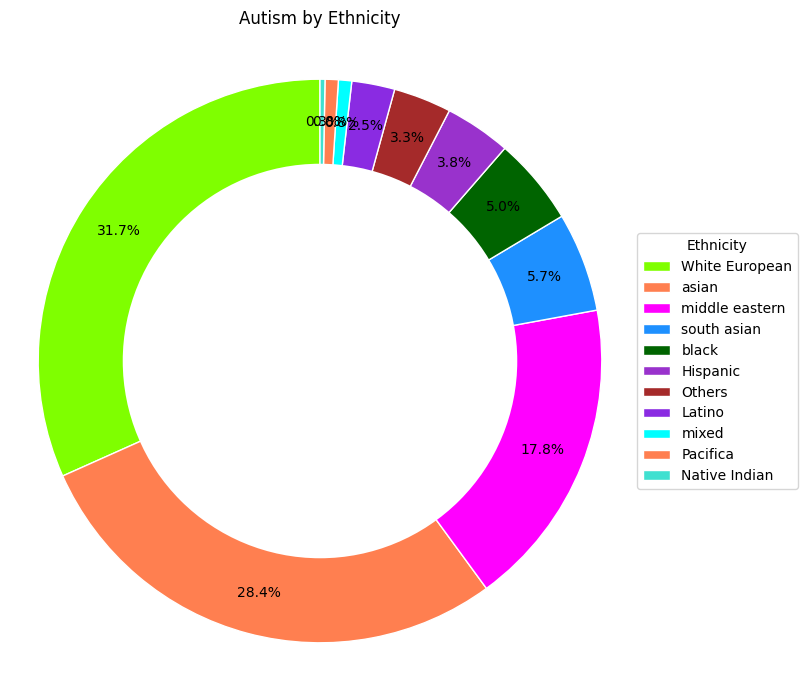

In [19]:
import matplotlib.pyplot as plt

# Define colors for each ethnicity
ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 
                    'darkorchid', 'brown', 'blueviolet', 'cyan', 'coral', 
                    'turquoise', 'gold']

# Extract ethnicity counts from the DataFrame
ethnicity_counts = train['Ethnicity'].value_counts()

# Plotting the donut chart
fig, ax = plt.subplots(figsize=(8, 8))

wedges, _, autotexts = ax.pie(
    ethnicity_counts, 
    labels=None,  # Remove direct labels from wedges
    autopct='%1.1f%%', 
    startangle=90,
    colors=ethnicity_colors, 
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=0.85  # Moves percentage labels outward
)

# Reduce percentage font size
for autotext in autotexts:
    autotext.set_fontsize(10)

# Add a legend for the labels
ax.legend(wedges, ethnicity_counts.index, title="Ethnicity", loc="center left", bbox_to_anchor=(1, 0.5))

# Add a circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title('Autism by Ethnicity\n')
plt.show()


In [20]:
# import warnings
# warnings.filterwarnings("ignore")

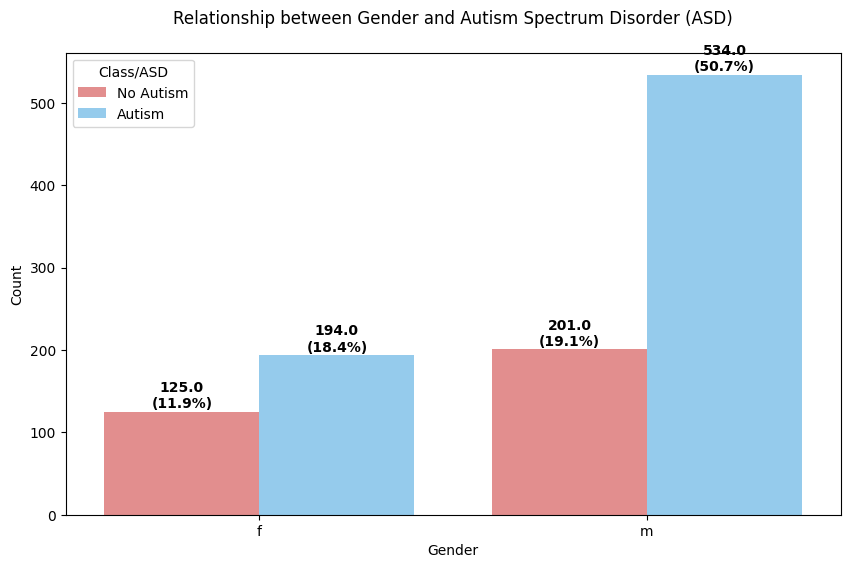

In [21]:
# Define colors for each class
class_colors = {'Yes': 'lightskyblue', 'No': 'lightcoral'}

# Plotting the relationship between Gender and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='Class/ASD', data=train, palette=class_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.8, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Autism Spectrum Disorder (ASD)\n')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()

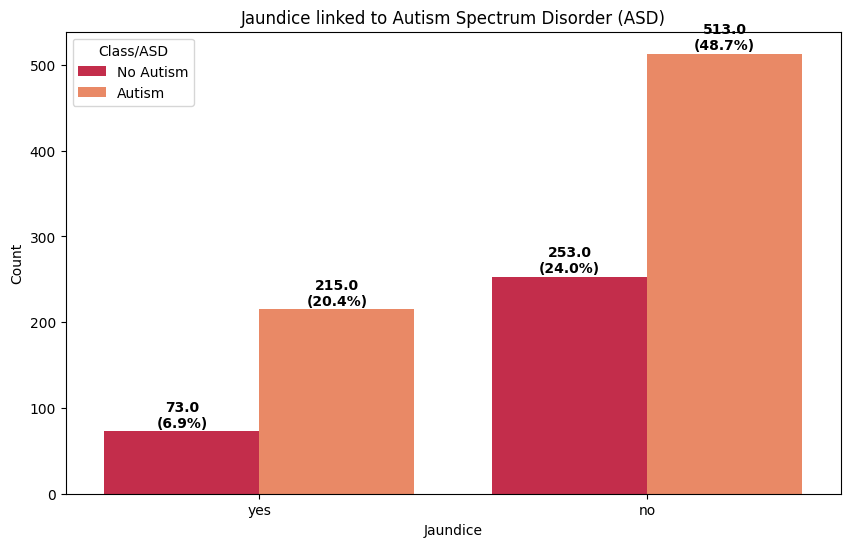

In [22]:
# Define colors for each class
jaundice_colors = ['crimson', 'coral']
jaundice_map = {'yes': 'Jaundice', 'no': 'No Jaundice'}

# Plotting the relationship between Jaundice and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Jaundice', hue='Class/ASD', data=train, palette=jaundice_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Jaundice linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()

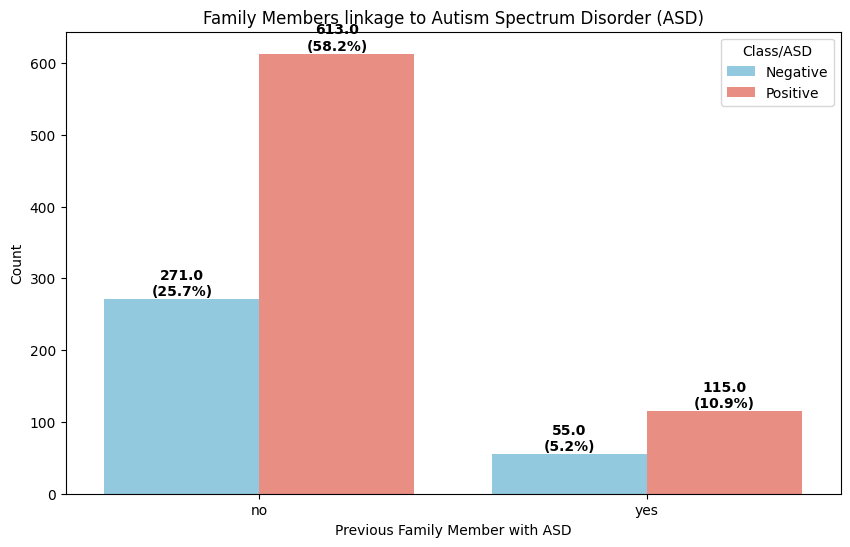

In [23]:
# Define colors for each class
jaundice_colors = ['skyblue', 'salmon']
jaundice_map = {'yes': 'Positive', 'no': 'Negative'}

# Plotting the relationship between Jaundice and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Family_mem_with_ASD', hue='Class/ASD', data=train, palette=jaundice_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Previous Family Member with ASD')
plt.ylabel('Count')
plt.title('Family Members linkage to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['Negative', 'Positive'])

# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

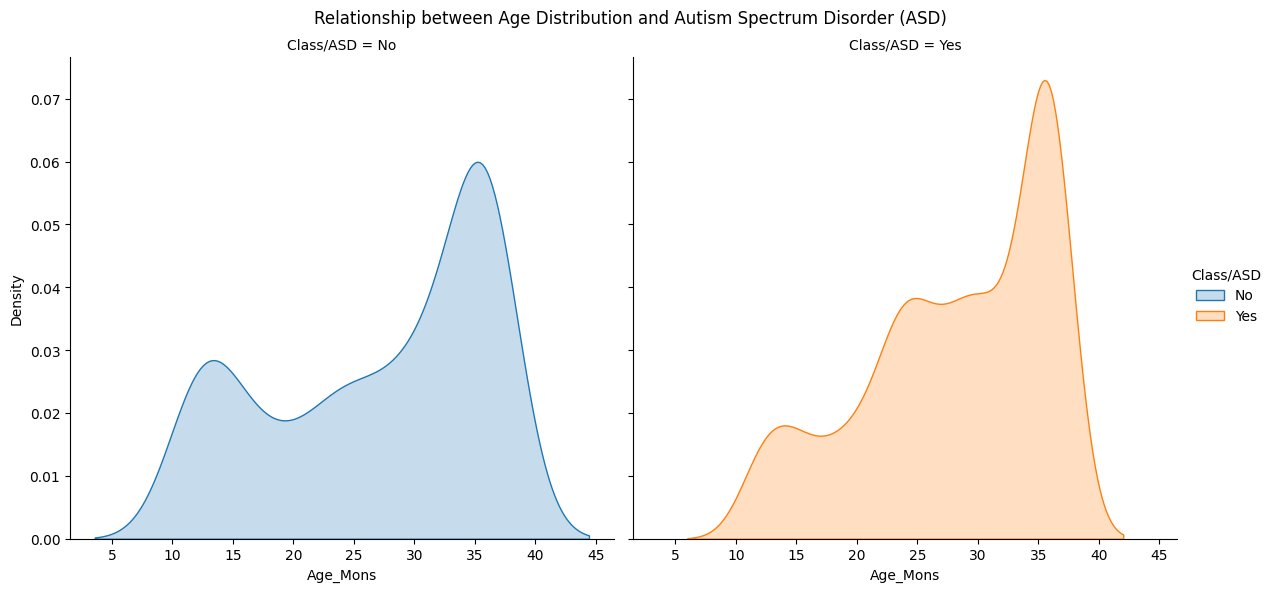

In [24]:
# Plotting the relationship between age distribution and Class/ASD
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(train, col='Class/ASD', hue='Class/ASD', height=6)
g.map(sns.kdeplot, 'Age_Mons', shade=True)
g.add_legend()

# Setting labels and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age Distribution and Autism Spectrum Disorder (ASD)')

# Display the plot
plt.show()

# Training the RF Classifier

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset (assuming it's loaded into a DataFrame named 'df')
# df = pd.read_csv('path_to_your_file.csv')

# Assuming the DataFrame 'df' is like the one displayed in your screenshot
# Handle missing values if any (simple example, might need more complex handling)
df.fillna(method='ffill', inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test']  # adjust as per your dataset
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define the feature columns and the target column
X = df.drop(['Class/ASD'], axis=1)
y = label_encoder.fit_transform(df['Class/ASD'])  # Encoding target labels

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Validate the model
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Test the model
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 1.0
Test Accuracy: 1.0


In [26]:
class_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}

# Print the class mapping
print("Label mappings:", class_mapping)
print("Encoded labels:", y)

Label mappings: {'No': 0, 'Yes': 1}
Encoded labels: [0 1 1 ... 1 0 1]


Test Accuracy: 100.00%
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        36
         Yes       1.00      1.00      1.00        70

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



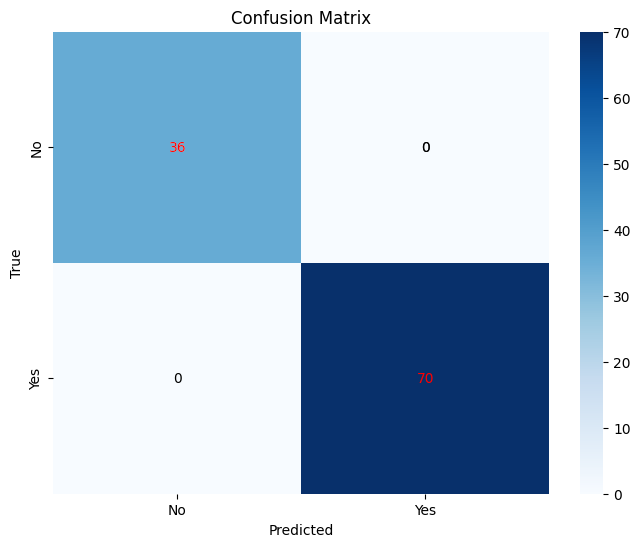

In [27]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print classification report
class_names = label_encoder.classes_  # This should correspond to ['No', 'Yes'] as encoded earlier
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Plot the confusion matrix with correct and incorrect counts
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add labels with different colors if needed
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='red' if conf_matrix[i, j] > 0 else 'black')  # Change color based on condition

plt.show()

Test Accuracy: 100.00%
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       326
         Yes       1.00      1.00      1.00       728

    accuracy                           1.00      1054
   macro avg       1.00      1.00      1.00      1054
weighted avg       1.00      1.00      1.00      1054



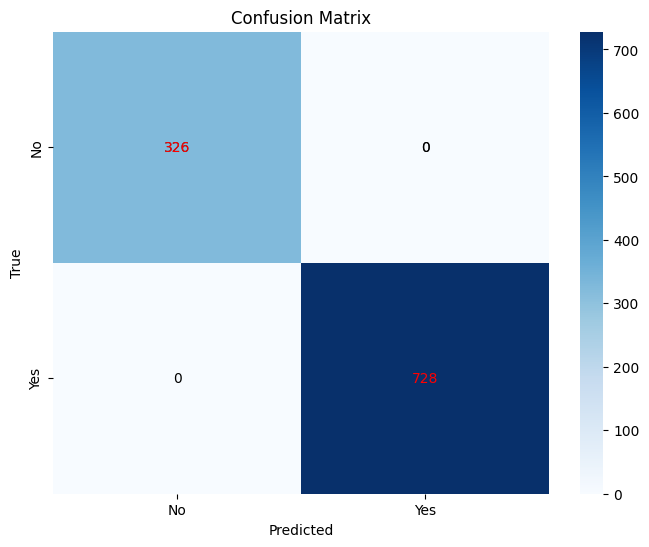

In [28]:
x_test = df.drop(['Class/ASD'], axis=1)
y_test = label_encoder.fit_transform(df['Class/ASD'])

y_test_pred = rf_model.predict(x_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print classification report
class_names = label_encoder.classes_  # This should correspond to ['No', 'Yes'] as encoded earlier
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Plot the confusion matrix with correct and incorrect counts
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add labels with different colors if needed
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='red' if conf_matrix[i, j] > 0 else 'black')  # Change color based on condition

plt.show()

## Clearly the signs of overfitting are observed so in order to remove overfitting we need more data as well as the data should be properly generalised.